In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.simplefilter("ignore", category=FutureWarning)
warnings.simplefilter("ignore", category=UserWarning)

In [141]:
import warnings
from sklearn.exceptions import FitFailedWarning

warnings.filterwarnings("ignore", category=FitFailedWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [142]:
df = pd.read_csv('/kaggle/input/insurance/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [144]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


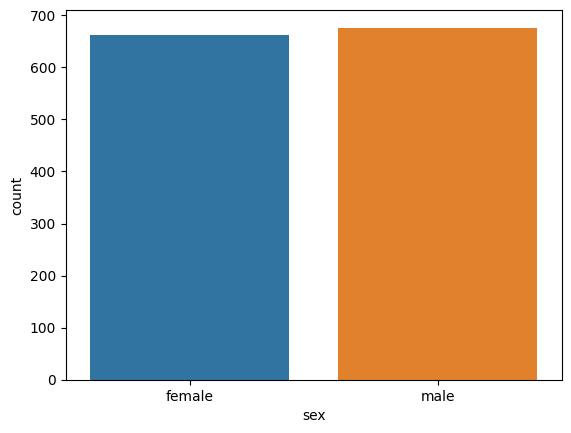

In [145]:
sns.countplot(data=df, x="sex")
plt.show()

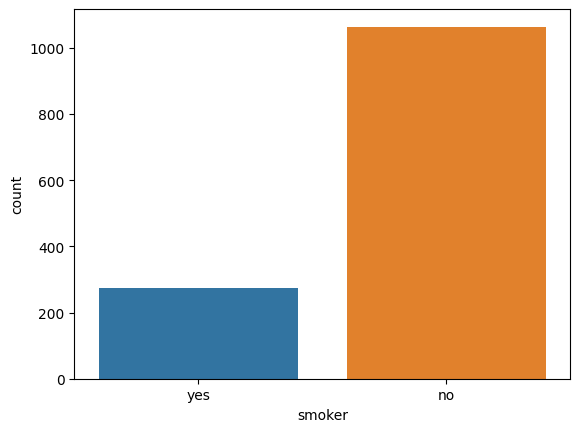

In [146]:
sns.countplot(data=df, x="smoker")
plt.show()

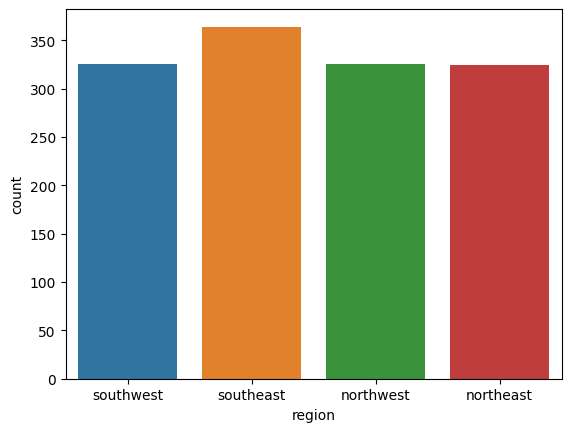

In [147]:
sns.countplot(data=df, x="region")
plt.show()

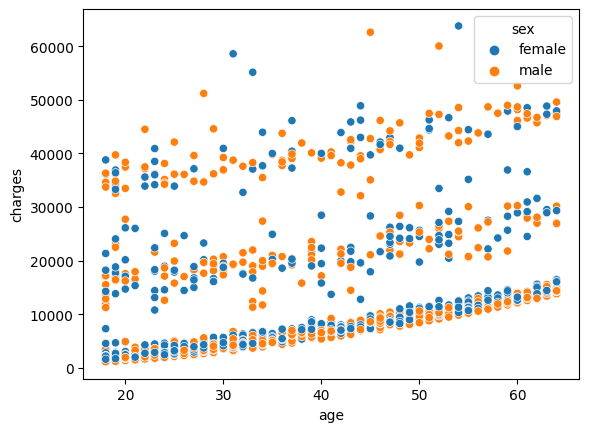

In [148]:
sns.scatterplot(data=df, x="age", y="charges", hue="sex")
plt.show()

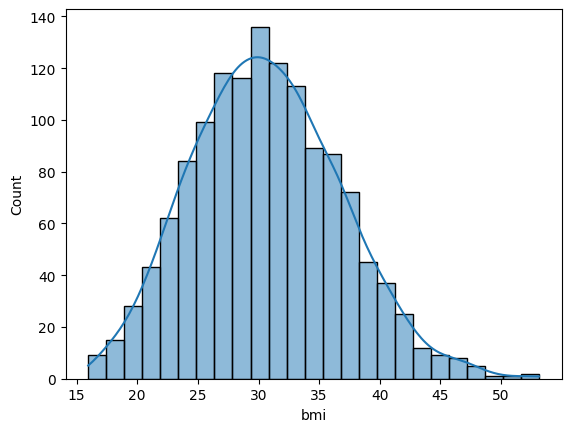

In [149]:
sns.histplot(data=df, x="bmi", kde=True)
plt.show()

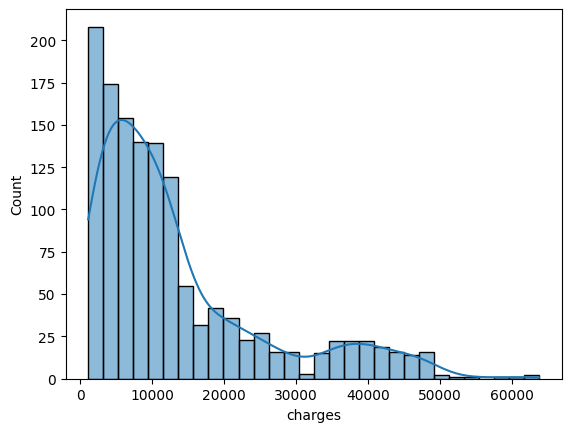

In [150]:
sns.histplot(data=df, x="charges", kde=True)
plt.show()

In [151]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [152]:
df["sex"] = df["sex"].map({"male" : 0, "female": 1})
df["smoker"] = df["smoker"].map({"no" : 0, "yes" : 1})

In [153]:
df["sex"].value_counts()

sex
0    676
1    662
Name: count, dtype: int64

In [154]:
df["smoker"].value_counts()

smoker
0    1064
1     274
Name: count, dtype: int64

In [155]:
X = df.drop("charges", axis=1)

In [156]:
y = df["charges"]

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 15)

In [159]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [160]:
categorical_cols = ["region"]

preprocessor = ColumnTransformer(transformers =
                                [
                                    ('cat', OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols)

                                ], remainder= "passthrough"                            
                                
                                )

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [161]:
from lightgbm import LGBMRegressor

In [162]:
model = LGBMRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [163]:
from sklearn.metrics import r2_score, mean_squared_error

In [164]:
print(r2_score(y_pred, y_test))
print(mean_squared_error(y_pred, y_test))

0.8636669836215215
18458085.613847945


In [165]:
param_grid = {
    "num_leaves" : [31, 50, 70],
    "max_depth" : [-1, 5, 10],
    "learning_rate" : [0.01, 0.05, 0.1],
    "n_estimators" : [100, 300, 1000],
    "min_child_samples" : [10, 20, 30],
    "subsample" : [0.6, 0.8, 1.0],
    "colsample_bytree" : [0.6, 0.8, 1.0],
    "reg_alpha" : [0, 0.5, 1.0],
    "reg_lambda": [0, 0.5, 1.0]



    
}

In [166]:
from sklearn.model_selection import RandomizedSearchCV

In [167]:
random_search = RandomizedSearchCV(
    estimator = LGBMRegressor(verbosity=-1),
    param_distributions = param_grid,
    cv=5,
    verbose=0,
    random_state=15,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

In [168]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(verbosity=-1), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [-1, 5, 10],
                                        'min_child_samples': [10, 20, 30],
                                        'n_estimators': [100, 300, 1000],
                                        'num_leaves': [31, 50, 70],
                                        'reg_alpha': [0, 0.5, 1.0],
                                        'reg_lambda': [0, 0.5, 1.0],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=15, scoring='neg_root_mean_squared_error')

In [169]:
random_search.best_params_

{'subsample': 0.6,
 'reg_lambda': 1.0,
 'reg_alpha': 0.5,
 'num_leaves': 50,
 'n_estimators': 100,
 'min_child_samples': 30,
 'max_depth': -1,
 'learning_rate': 0.1,
 'colsample_bytree': 0.8}

In [170]:
y_pred = random_search.predict(X_test)

In [171]:
print(r2_score(y_pred, y_test))
print(mean_squared_error(y_pred, y_test))

0.8775521864086795
16446549.93278381


In [172]:
from scipy.stats import boxcox

In [173]:
y_train_transformed, lambda_y = boxcox(y_train)


In [174]:
model = LGBMRegressor()
model.fit(X_train, y_train_transformed)

LGBMRegressor()

In [175]:
y_pred_transformed = model.predict(X_test)

In [176]:
def inverse_boxcox(y, lambda_):
    if lambda_ == 0:
        return np.exp(y)
    else:
        return np.power(y*lambda_ + 1, 1 / lambda_)

In [177]:
y_pred_original = inverse_boxcox(y_pred_transformed, lambda_y)



In [178]:
print(r2_score(y_pred, y_test))
print(mean_squared_error(y_pred_original, y_test))

0.8775521864086795
15470028.378876308
